# MTH5001:  Introduction to Computer Programming 2021/22

## Final Report Project: "Atmospheric Carbon Dioxide Levels"

<div class="alert alert-block alert-danger">

**IMPORTANT**: 
Start by filling in your Name and student ID below. **DO IT NOW**. Save this Jupyter Notebook with the name *MTH5001_surname_ID.ipynb*, where instead of *surname* and *ID* you write your surname and your student ID number.
Use the available cells to introduce the code. You can add additional cells if needed. explain your code as much as possible with `# comments` </div>

<div class="alert alert-block alert-warning">
    
### Name: Jerushan Perumal

### ID: 200254210




<br />









### Instructions:

You must write your answers in this Jupyter Notebook, using either Markdown or Python code as appropriate. 

Your code must be **well documented**. As a rough guide, you should aim to include one line of comments for each line of code (but you may include more or fewer comments depending on the situation).

The total number of marks available is 100. Attempt all parts of all questions.

For this project, you are expected to write your code almost entirely 'from scratch', although you are allowed to use some specific packages like `numpy`, `matplotlib.pyplot`, etc.

### Submission deadline:

You must submit your work via QMPlus, to the "Final Report Project" assignment in the "Final Report Project" section under the "Assessment" tab.

The submission deadline is **11:55pm on Thursday 5 May, 2022**. Late submissions will be penalised according to the School's [guidelines](https://qmplus.qmul.ac.uk/mod/book/view.php?id=1723496&chapterid=135310).

Your lecturers will respond to project-related emails until 5:00pm on Tuesday 3 May, 2022, only. You should aim to have your project finished by this time.

### Marking of projects:

When writing up projects, good writing style is even more important than in written exams. According to the [advice](https://qmplus.qmul.ac.uk/mod/book/view.php?id=1723496&chapterid=135293) in the student handbook,

> To get full marks in any assessed work (tests or exams) you must normally not only give the right answers but also explain your working clearly and give reasons for your answers by writing legible and grammatically correct English sentences. Mathematics is about logic and reasoned arguments and the only way to present a reasoned and logical argument is by writing about it clearly. Your writing may include numbers and other mathematical symbols, but they are not enough on their own. You should copy the writing style used in good mathematical textbooks, such as those recommended for your modules. **You can expect to lose marks for poor writing (incorrect grammar and spelling) as well as for poor mathematics (incorrect or unclear logic).**

<div class="alert alert-block alert-danger">
    
### Plagiarism warning:

Your work will be tested for plagiarism, which is an assessment offence, according to the [School's policy on Plagiarism](https://qmplus.qmul.ac.uk/mod/book/view.php?id=1723496&chapterid=135294). In particular, while only academic staff will make a judgement on whether plagiarism has occurred in a piece of work, we will use the plagiarism detection software "Turnitin" to help us assess how much of work matches other sources. You will have the opportunity to upload your work, see the Turnitin result, and edit your work once accordingly before finalising your submission.


However, you must use your own words as far as possible (within reason, e.g. you would not be expected to change the wording of a well-known theorem), and you **must** [reference](https://qmplus.qmul.ac.uk/mod/book/view.php?id=1723496&chapterid=135300) any sources that you use. You cannot communicate with other students on any part of the project. You should also note that some of the questions are personalised in the sense that you will need to import and manipulate data that will be unique to you (i.e. no other student will have the same data).







---
### The Keeling curve
This project deals with the analysis of atmospheric carbon dioxide levels as measured by the Mauna Loa Observatory in Hawaii over the last 50 years. This data is known as the [Keeling curve]( https://en.wikipedia.org/wiki/Keeling_Curve).

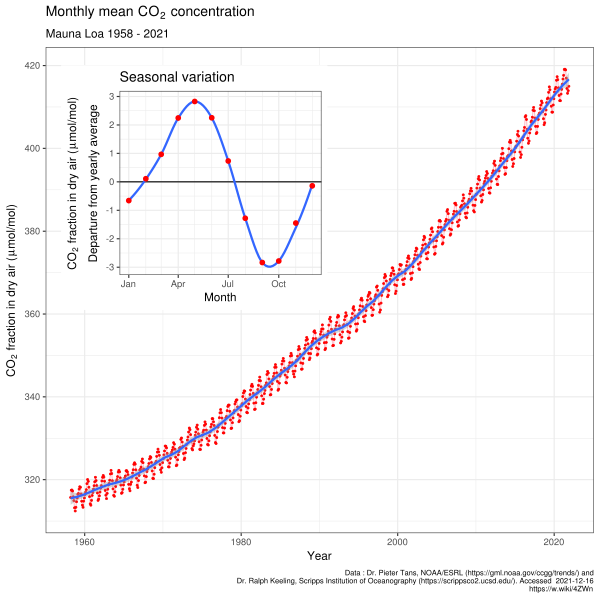

This project consists of **four parts**. In each of the parts you will need to code up some specific functions, run some code, and respond to some questions. Recall that all code needs to be properly documented with `# comments`, and the explanations in these comments will indeed be assessed and you will receive lots of marks for adequate documentation. 



* The **first part** is about loading and visualising historical $CO_2$ levels in the atmosphere.

* The **second part** asks you to write code for polynomial fitting.

* The **third part** compares global and local trend fitting.

* The **fourth part** focusses on the seasonal variations.

<br />


---

The following code box is used to load any necessary modules. **You may not import any other modules.**

In [1]:
#DO NOT CHANGE THE CONTENT OF THIS CODE BOX
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Part 1: Loading and cleaning data [20 marks total]
*** ***

<div class="alert alert-block alert-danger">
    
Please remember to write plenty of `# comments` in the code cells. Mark scheme is depicted in each question. 50% of the marks will go to assess the actual code, and 50% of the marks will go to assess the `# comments`. Remember also to **reference** any sources you used. If you used any code or coding ideas you found elsewhere, you are encouraged to do that in the `# comments`.


---

**[1.1] [6 marks]** Load the data from the file "Mauna_Loa_CO2.csv" into a pandas dataframe named `Mauna_Loa_df` and display it. You should get a dataframe with 2494 rows and 9 columns with the first column looking as follows:
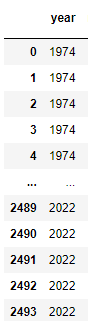

If you encounter difficulties doing this it may help to inspect the content of the csv file in a text editor.

---

In [2]:
# Had issues trying to import the file with a tokenizing error at first; used the below website to try different workarounds and found a solution to my problem.
# Upon inspecting the error code and the .csv file it made sense to skip the first 47 lines of the document as they were comments which was affecting the Jupyter Notebooks ability to load the dataframe
# https://www.stackvidhya.com/solve-python-pandas-error-tokenizing-data-error/
Mauna_Loa_df=pd.read_csv('Mauna_Loa_CO2.csv', skiprows=47)

Mauna_Loa_df

,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800
0,1974,5,19,1974.3795,333.37,5,-999.99,-999.99,50.40
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.35,5,-999.99,-999.99,49.60
3,1974,6,9,1974.4370,332.20,7,-999.99,-999.99,49.65
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.06
...,...,...,...,...,...,...,...,...,...
2489,2022,1,30,2022.0808,419.19,7,416.89,393.28,138.47
2490,2022,2,6,2022.1000,418.38,6,417.04,393.99,137.55
2491,2022,2,13,2022.1192,419.76,7,416.59,394.02,138.82
2492,2022,2,20,2022.1384,419.62,7,416.30,394.30,138.57


---
**[1.2] [6 marks]** Using this dataframe, produce a plot of the carbon dioxide data contained therein versus time. The relevant columns in the csv file are "average" and "decimal", containing average carbon dioxide levels in ppm and the date in years, respectively. 

Clearly label the content, a plot simply showing the defaults "average" and "decimal" will be insufficient. 

If you encounter difficulties it may help to inspect the content of the csv file or the dataframe directly.

---

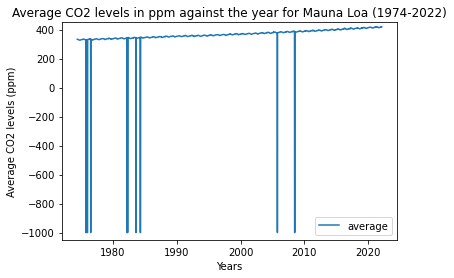

In [3]:
# .plot() method to plot the asked data and xlabel and ylabel to print out the axis title and a title to describe what the plot is showing
# Also add a y limit for the y axis to show the full data clearer. https://stackoverflow.com/questions/17787366/setting-yaxis-in-matplotlib-using-pandas
Mauna_Loa_df.plot(x= 'decimal', y='average', ylim=(-1050,450),title='Average CO2 levels in ppm against the year for Mauna Loa (1974-2022)')
plt.xlabel('Years')
plt.ylabel('Average CO2 levels (ppm)')
plt.show()

---
**[1.3] [8 marks]** In the above plot you will have noted irregularities, presumably due to missing data. Describe these and amend the dataframe accordingly. Replot.


---

              year        month          day      decimal      average  \
count  2494.000000  2494.000000  2494.000000  2494.000000  2494.000000   
mean   1997.767843     6.532478    15.730553  1998.268652   359.165457   
std      13.804325     3.451624     8.802484    13.800657   118.590559   
min    1974.000000     1.000000     1.000000  1974.379500  -999.990000   
25%    1986.000000     4.000000     8.000000  1986.324000   347.392500   
50%    1998.000000     7.000000    16.000000  1998.268500   365.520000   
75%    2010.000000    10.000000    23.000000  2010.213000   389.237500   
max    2022.000000    12.000000    31.000000  2022.157500   420.010000   

             ndays   1 year ago  10 years ago  increase since 1800  
count  2494.000000  2494.000000   2494.000000          2494.000000  
mean      5.880914   329.623925     64.396099            81.199491  
std       1.365090   227.272112    560.548637            95.529432  
min       0.000000  -999.990000   -999.990000          -9

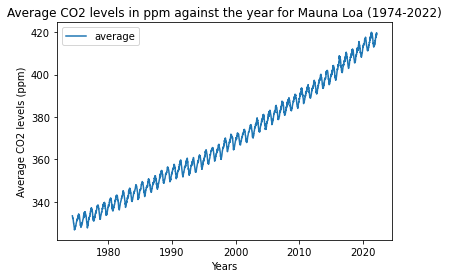

In [4]:
# Used .describe() to display a summary for the dataframe to see where the outlier value was
# Week 10 Lab provided this code
print(Mauna_Loa_df.describe())

# Set a greater than comparison operator to get rid of the extreme minimum values from the dat frame column "average", in my case i have set it above 0 so the plot has the origin (0,0) in the bottom left corner of the plot 
Mauna_Loa_df2 = Mauna_Loa_df[Mauna_Loa_df['average'] > 0]
# Pretty much the same plot but this time its without the irregularities
Mauna_Loa_df2.plot(x= 'decimal', y='average',title='Average CO2 levels in ppm against the year for Mauna Loa (1974-2022)')
plt.xlabel('Years')
plt.ylabel('Average CO2 levels (ppm)')
plt.show()


# Part 2: Polynomial fitting [30 marks total]
*** ***

<div class="alert alert-block alert-danger">
    
Please remember to write plenty of `# comments` in the code cells. Mark scheme is depicted in each question. 50% of the marks will go to assess the actual code, and 50% of the marks will go to assess the `# comments`. Remember also to **reference** any sources you used. If you used any code or coding ideas you found elsewhere, you are encouraged to do that in the `# comments`.




In this section you will develop a polynomial fitting routine in order to estimate the overall trend in the carbon dioxide curve. For this, you might want to refer to Section 7.7 in the [Linear Algebra lecture notes]( https://qmplus.qmul.ac.uk/pluginfile.php/2820808/mod_resource/content/3/notes2019.pdf) which was covered in week 11 of last term, in particular Theorem 7.35.

## Background information

In many applications, we might be given a set of data points

$$(x_1,y_1), (x_2,y_2), \ldots, (x_n,y_n)$$

in the $x,y$-plane, and required to determine whether there is a relationship between the $x$ variable and the $y$ variable. 
For example, a financial analyst might need to determine whether there is a relationship between two stock prices, while a climate scientist might need to know whether temperatures are related to levels of a certain pollutant in the atmosphere.

A common way to determine whether two data sets $x_1, x_2, \ldots, x_n$ and $y_1, y_2, \ldots, y_n$ are related is to find a function

$$y = f(x)$$

that 'best fits' the data, so that each $y_i$ is approximately equal to $f(x_i)$, with very small error. 

In order to find the 'best fit' the data, one attempts to minimise the **sum of squares of the errors (or "SSE")**,

$$SSE = \sum_{i=1}^n (y_i - f(x_i))^2$$

In other words, we want to minimise the sums of the squares of all the differences between the actual $y$-values (the $y_i$) and the 'predicted' $y$-values by substituting the corresponding $x_i$ values into the equation $y = f(x)$.

This process is called **least squares regression**. 

The function $f(x)$ usually depends on certain parameters for which we need to solve. 
For example, to determine whether the $x$- and $y$-variables have a **linear relationship**, we would use a linear function

$$f(x) = a_0 + a_1 x$$

and try to find the parameters $a_0$ and $a_1$ that make $f(x)$ 'best fit' the data. 
This means that we want to find the coefficients $a_0$ and $a_1$ for which the quantity
$$SSE = \sum_{i=1}^n (y_i - a_0 - a_1x_i)^2$$ is minimised.

More generally, **polynomial (least squares) regression** involves assuming that

$$f(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_m x^m$$

for some integer $m \geq 1$, and finding the parameters $a_0, a_1, a_2 \ldots, a_m$ that minimise SSE. In other words, we wish to fit a function

$$f(x) = a_0 + a_1x + a_2x^2 + \cdots a_mx^m$$

to our data points $(x_1,y_1), (x_2,y_2), \ldots, (x_n,y_n)$, where $m$ is some (chosen but arbitrarily large) positive integer. 
Observe that $m=1$ for linear regression, and $m=2$ for quadratic regression. 
We need to minimise

$$SSE = ||y - f(x)||^2.$$

for polynomial regression we therefore consider the matrices

$$X = \left[ \begin{array}{ll} 1&x_0&x_0^2&\cdots&x_0^m \\ 1&x_1&x_1^2&\cdots&x_1^m \\ \vdots&\vdots \\ 1&x_n&x_n^2&\cdots&x_n^m \end{array} \right], \quad
\mathbf{y} = \left[ \begin{array}{l} y_1 \\ y_2 \\ \vdots \\ y_n \end{array} \right], \quad \text{and} \quad
\mathbf{a} = \left[ \begin{array}{l} a_0 \\ a_1 \\ a_2 \\ \vdots \\ a_m \end{array} \right],$$

and we again find that

$$SSE = ||\mathbf{y} - X\mathbf{a}||^2,$$

meaning that $\mathbf{a}$ should be chosen to be a least squares solution of the system $X\mathbf{a} = \mathbf{y}$. 
Hence, we can find $\mathbf{a}$ by solving the normal equations

$$(X^TX)\mathbf{a} = X^T\mathbf{y}.$$

more details, in particular proofs, are given in Section 7.7 in the [Linear Algebra lecture notes]( https://qmplus.qmul.ac.uk/pluginfile.php/2820808/mod_resource/content/3/notes2019.pdf).

Python provides this functionality with the function polyfit. If you followed instructions precisely, the following should work for you.

```python

np.polyfit(Mauna_Loa_df["decimal"],Mauna_Loa_df["average"],2)


---
**[2.1] [5 marks]** Ensure that the above line of code works for your dataframe.

Note: you may have to consult the documentation about the meaning of the output.

---

In [5]:
# Looking at the documentation np.polyfit essentially fits the data for a polynomial
# The values which are returned in the array are the coefficients to a polynomial
# 3 coefficients are returned so
np.polyfit(Mauna_Loa_df["decimal"],Mauna_Loa_df["average"],2)

array([-1.70593584e-02,  7.05866699e+01, -7.25693744e+04])

---
**[2.2] [10 marks]** This gives you coefficients for a quadratic fit. Plot the carbon dioxide data together with the fitted curve.

---

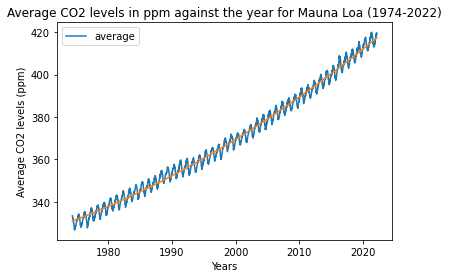

In [6]:
# Assigning a simpler name to this np.polyfit code for easier use later
# Changed it to Mauna_Loa_df2 as the fitted line later on didn't look correct when using original data. with the irregularities
coef = np.polyfit(Mauna_Loa_df2["decimal"],Mauna_Loa_df2["average"],2)
coef
# https://www.pythonpool.com/numpy-polyfit/
# Used above website to research more about np.polyfit and various examples
# Near the bottom of the page there is a tip on plotting a linear regression using np.polyfit
# According to the website poly1d function from numpy generates the best fitting line equation from polyfit
LR = np.poly1d(coef)
# same plot as from 1.2 
Mauna_Loa_df2.plot(x= 'decimal', y='average',title='Average CO2 levels in ppm against the year for Mauna Loa (1974-2022)')
# Struggled to figure out how to plot the fitted curve with the data as I was using the 'decimal' column
# https://www.delftstack.com/howto/matplotlib/plot-numpy-linear-fit-matplotlib-python/
# Above website showed an example and I followed that and realised I made the error and used the xaxis values to write the rest of the code
# I used the value of 2500 but ran into a dimension error, set it so both dimensions matched which is 2494, as the stated number of data.
# Used np.arange from the given website stated 2 lines above, read about it to understand what it does on https://numpy.org/doc/stable/reference/generated/numpy.arange.html

# Used plt.plot to plot the fitted curve onto the CO2 data
plt.plot(Mauna_Loa_df2['decimal'],LR(Mauna_Loa_df2['decimal']))
plt.xlabel('Years')
plt.ylabel('Average CO2 levels (ppm)')
plt.show()

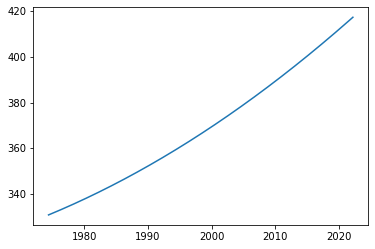

In [7]:
# This is the curve which is plotted
# Done this to double check evrything was in check
plt.plot(Mauna_Loa_df2["decimal"],LR(Mauna_Loa_df2["decimal"]))
plt.show()

---
**[2.3] [10 marks]** We now would like you to replace the polyfit function by your own code, without making reference to any provided fitting routines: write a function `least_squares_solver_polynomial` which takes as input a pandas dataframe with two numerical columns containing x and y values, and the degree $m$ of a polynomial (a positive integer), and computes the corresponding polynomial regression coefficients $a_0, a_1, a_2, \ldots, a_m$. The output of your function should be a **list** of the form `[a0, a1, a2, ..., am]` containing the $m+1$ coefficients $a_0, a_1, a_2, \ldots, a_m$ in that order.

Note: you are allowed to use np.linalg.solve(), but not np.polyfit() or similar.

---

In [8]:
def least_squares_solver_polynomial(dataframe,m):
# Searched the numpy library and found .keys()on w3schools which could be used to "return a view object"
# https://www.w3schools.com/python/ref_dictionary_keys.asp
    x = dataframe[dataframe.keys()[0]]
    y = dataframe[dataframe.keys()[1]]
    # converting the x column to an array
    xmatrix = np.asarray(x)
# read up on the website below on constructing the x column, vandermorde matrix was mentioned
# https://uk.mathworks.com/matlabcentral/answers/51991-writing-my-own-polyfit-function
# found out numpy library had a way of creating a vandermorde matrix which was very similar to the one stated in the question description above 2.1
# set it to have increasing equals true so the ones will all be in the left column however there was a row of 1s at the top aswell
    xmatrixv2 = np.vander(xmatrix, m+1, increasing=True)
# https://numpy.org/doc/stable/index.html
# Both np.delete and np.vander was sourced from this website above
    # Creating the y array for the least squares solver
    ymatrix = np.asarray(y)
    # all of the below operations was from the week 11 lecture notes
    # Create the transpose of the x
    xtranspose = xmatrixv2.T
    # Multiply x transpose and x
    f = xtranspose@xmatrixv2
    # Multiply x transpose and y
    h = xtranspose@ymatrix
    # Use numpy.linalg.solve to work out coefficients for the array
    LSSONE = np.linalg.solve(f,h)
    # Used list slicing to correct the error described in 2.4 below
    # https://www.askpython.com/python/array/reverse-an-array-in-python
    return LSSONE

---
**[2.4] [5 marks]** Run your least squares solver by using
```python
least_squares_solver_polynomial(Mauna_Loa_df[["decimal","average"]],2)
```

and compare the output with the above result obtained by using polyfit. How good is the agreement?

---

In [9]:
# at first when running the function defined above, I got the same exact values but reversed, so the last coef from np.polyfit, was my first value in my own function
# for this I used list slicing to reverse the array.
least_squares_solver_polynomial(Mauna_Loa_df[["decimal","average"]],2)

array([-7.25693898e+04,  7.05866853e+01, -1.70593623e-02])


# Part 3: Global fitting versus local fitting [25 marks total]
*** ***

<div class="alert alert-block alert-danger">
    
Please remember to write plenty of `# comments` in the code cells. Mark scheme is depicted in each question. 50% of the marks will go to assess the actual code, and 50% of the marks will go to assess the `# comments`. Remember also to **reference** any sources you used. If you used any code or coding ideas you found elsewhere, you are encouraged to do that in the `# comments`.




If you look carefully you will notice that a quadratic fit is perhaps not the best way to capture the trend. There are two ways to improve this

1. You can experiment with taking higher degree polynomials
2. You can do local fits by computing averages

Note: if you did not manage to get least_squares_solver_polynomial to work, you are permitted to use polyfit instead.

---
**[3.1] [10 marks]** A good way to eyeball the quality of the fit and to check for systematic errors is to plot the difference between the actual and the fitted data. Produce plots showing this difference for fits with degrees one (linear) to six and describe what you can conclude.

---


In [17]:
# Define different names for each degree for the fit

coef1 = least_squares_solver_polynomial(Mauna_Loa_df2[["decimal","average"]],1)
coef2 = least_squares_solver_polynomial(Mauna_Loa_df2[["decimal","average"]],2)
coef3 = least_squares_solver_polynomial(Mauna_Loa_df2[["decimal","average"]],3)
coef4 = least_squares_solver_polynomial(Mauna_Loa_df2[["decimal","average"]],4)
coef5 = least_squares_solver_polynomial(Mauna_Loa_df2[["decimal","average"]],5)
coef6 = least_squares_solver_polynomial(Mauna_Loa_df2[["decimal","average"]],6)

# Wrote all this out for later use, had a warning message come up saying "polyfit may be poorly conditioned"
# Quick google search showed that the order of the degree is too high and that data could be easily influenced
# As question states for the difference between actual and fitted, it would be okay to ignore ths warning.
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# Added the (::-1) to reverse the array of my least squares polynomial solver

LR1 = np.poly1d((coef1)[::-1])
LR2 = np.poly1d((coef2)[::-1])
LR3 = np.poly1d((coef3)[::-1])
LR4 = np.poly1d((coef4)[::-1])
LR5 = np.poly1d((coef5)[::-1])
LR6 = np.poly1d((coef6)[::-1])

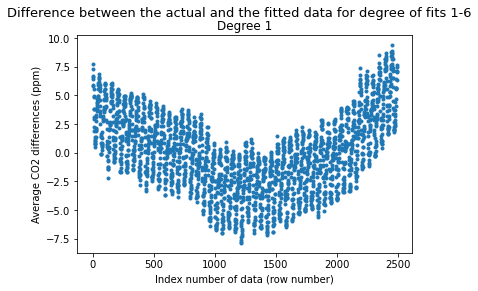

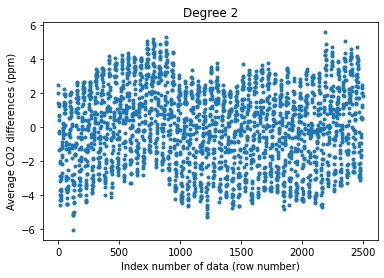

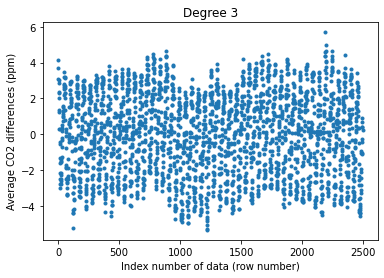

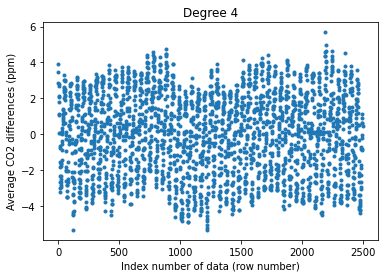

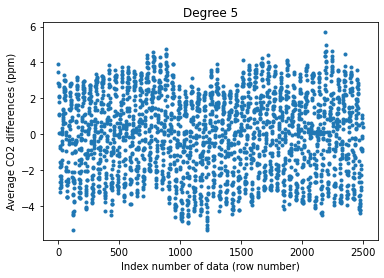

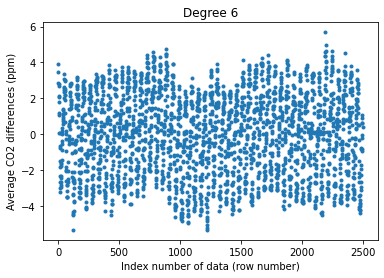

In [16]:
# used plt.figure(1-6) to show all graphs in one code box
# https://stackoverflow.com/questions/7744697/how-to-show-two-figures-using-matplotlib
plt.figure(1)
# Used the marker to "emphasise each point" 
# https://www.w3schools.com/python/matplotlib_markers.asp
# Tried to plot without linestyle but the plots were not clear so I added that to make it better visually
# https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle
plt.plot(Mauna_Loa_df2['average']-LR1(Mauna_Loa_df2['decimal']), marker='.', linestyle='')
plt.xlabel('Index number of data (row number)')
plt.ylabel('Average CO2 differences (ppm)')
# https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
# Made a main title for all 6 plots
plt.suptitle('Difference between the actual and the fitted data for degree of fits 1-6', size=13)
plt.title('Degree 1')
plt.show()

plt.figure(2)
plt.plot(Mauna_Loa_df2['average']-LR2(Mauna_Loa_df2['decimal']), marker='.', linestyle='')
plt.xlabel('Index number of data (row number)')
plt.ylabel('Average CO2 differences (ppm)')
plt.title('Degree 2')
plt.show()

plt.figure(3)
plt.plot(Mauna_Loa_df2['average']-LR3(Mauna_Loa_df2['decimal']), marker='.', linestyle='')
plt.xlabel('Index number of data (row number)')
plt.ylabel('Average CO2 differences (ppm)')
plt.title('Degree 3')
plt.show()

plt.figure(4)
plt.plot(Mauna_Loa_df2['average']-LR4(Mauna_Loa_df2['decimal']), marker='.', linestyle='')
plt.xlabel('Index number of data (row number)')
plt.ylabel('Average CO2 differences (ppm)')
plt.title('Degree 4')
plt.show()

plt.figure(5)
plt.plot(Mauna_Loa_df2['average']-LR5(Mauna_Loa_df2['decimal']), marker='.', linestyle='')
plt.xlabel('Index number of data (row number)')
plt.ylabel('Average CO2 differences (ppm)')

plt.title('Degree 5')
plt.show()
plt.figure(6)
plt.plot(Mauna_Loa_df2['average']-LR6(Mauna_Loa_df2['decimal']), marker='.', linestyle='')
plt.xlabel('Index number of data (row number)')
plt.ylabel('Average CO2 differences (ppm)')
plt.title('Degree 6')
plt.show()

In [18]:
# Deg 4-6 show real similar graphs with barely any differences
# deg 1 and 2 have the most differences between the two plots
# deg 2 shows the best fluctuation in data

---
**[3.2] [8 marks]** Now produce local fits. A very simple approach is to compute an average across a full year, with the date you want to estimate right in the middle. (Note: depending on how you code this, you may have to make reasonable adjustments towards the start and the end of your time range.)

To do this, you should first write a function
```python
def local_fit(data,xmin,xmax):
    # add your code
    return yaverage
```
that takes a  takes as input a pandas dataframe with two numerical columns containing x and y values, and two values xmin and xmax and returns the average over all values of y for which xmin < x < xmax.

As an example,
```python
local_fit(Mauna_Loa_df[["decimal","average"]],2000,2001)
```
should give a carbon dioxide concentration of around 369.7 ppm.

---


In [13]:
def local_fit(dataframe,xmin,xmax):
    x = dataframe[dataframe.keys()[0]]
    y = dataframe[dataframe.keys()[1]]
    # Using boolean operators here to set the inequality
    # dataframe = dataframe[(xmin <= x < xmax)]
    # The line above was what I tried but I got given an error: 'truth value of a series is ambiguous'
    # https://stackoverflow.com/questions/36921951/truth-value-of-a-series-is-ambiguous-use-a-empty-a-bool-a-item-a-any-o
    # The community mentioned to use bitwise operators which would do it bit by bit
    dataframe = dataframe[(x >= xmin) & (x < xmax)]
    yaverage = dataframe['average'].mean()
    return yaverage

In [14]:
local_fit(Mauna_Loa_df[["decimal","average"]],2000,2001)

369.73301886792456

---
**[3.3] [7 marks]** Now that you have the local averaging, produce two plots, one displaying the average per year and
one displaying the difference to that average.

---


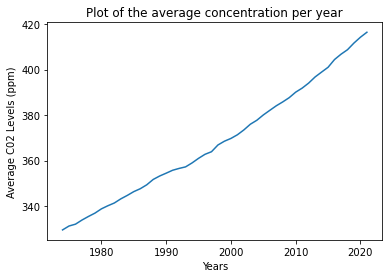

In [20]:
# Create two empty lists so that the values could be added to them later
avgperyear=[]
year=[]
for i in range (1974,2022):
    year.append(i)
    # Using the local fit function which i defined in 3.2 to work out averages for every year in the dataframe
    avgperyear.append(local_fit(Mauna_Loa_df2[["decimal","average"]],i,i+1))

plt.figure(1)
plt.plot(year,avgperyear)
plt.title('Plot of the average concentration per year')
plt.xlabel('Years')
plt.ylabel('Average C02 Levels (ppm)')
plt.show()


# Part 4: Looking at the yearly variations [25 marks total]
*** ***

<div class="alert alert-block alert-danger">
    
Please remember to write plenty of `# comments` in the code cells. Mark scheme is depicted in each question. 50% of the marks will go to assess the actual code, and 50% of the marks will go to assess the `# comments`. Remember also to **reference** any sources you used. If you used any code or coding ideas you found elsewhere, you are encouraged to do that in the `# comments`.




For this part, we consider the difference between the carbon dioxide levels and the yearly averages. This data, while noisy, seems to oscillate with a period of one year, and it makes therefore sense to look at this oscillation more closely. In an nutshell, we are going to work towards obtaining a picture similar to the one in the inset in the Keeling curve figure at the top of this document.

---
**[4.1] [10 marks]** Plot the differences obtained in Question 3.3 versus the time of year as measured in months.

Note: it is advisable to plot individual data points that are not connected by lines

---


---
**[4.2] [10 marks]** Find a sensible way of interpolating the data you just plotted. Add the curve thus obtained to the plot in the previous question. You may notice that there is some roughness in your plot that indicates that we are at the limit of what we can sensibly analyse.

Note: this question is stated purposefully vaguely to give you a chance to showcase your talent (or your prowess with Google). As a timely reminder, any use of code found online must be carefully referenced, otherwise it will be deemed plagiarism.

---


---
**[4.3] [5 marks]** You are now in a position to clearly separate overall trend, seasonal variation, and residual effects. Finish the project by creating a plot of the residual noise, similar to the bottom graph in the image below. Describe how the residual effects compare to the seasonal variation.

(You are welcome to provide all four plots together, but you will only be assessed on plotting the residual effects.)


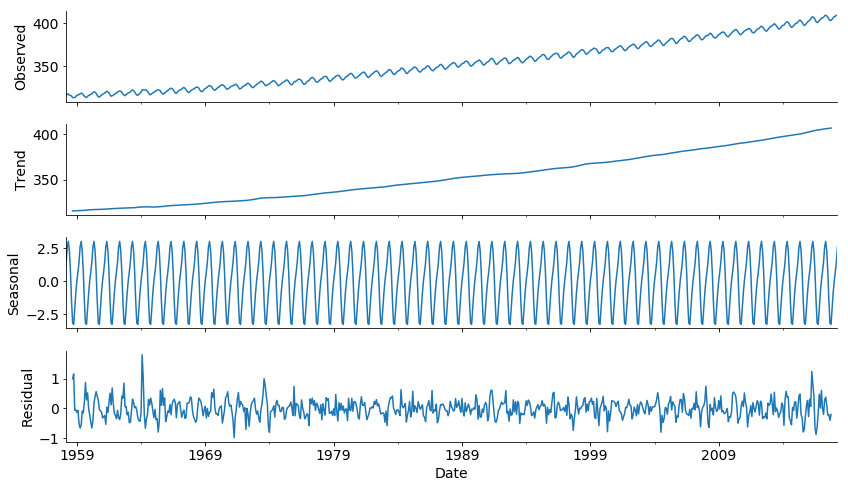

---
